In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #some plot styling

The point: Use argsort function along multiple axes to find nearest neighbors of each point in a set.

[[0.82797613 0.19510048]
 [0.40781285 0.20023956]
 [0.03125887 0.68611192]
 [0.94691062 0.91800475]
 [0.05446303 0.43864678]
 [0.11636609 0.51186318]
 [0.88968525 0.13858316]
 [0.13258521 0.44954985]
 [0.56864043 0.5909056 ]
 [0.18528968 0.18996971]]


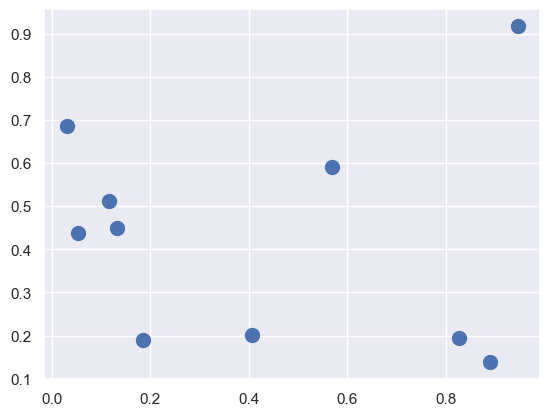

In [4]:
X = np.random.rand(10,2) #set of 10 points in a 2d plane 10x2
print(X)

#visualize points
plt.scatter(X[:,0],X[:,1], s=100); #plot coordinate pairs

In [5]:
#compute distance between each pair of points
#use efficient broadcasting and aggregation
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :,:]) ** 2 ,axis=-1)

#Now breaking this up
#first compute difference in coordinates between each pair of points
differences = X[:, np.newaxis, :] - X[np.newaxis, :,:] #using broadcasting
print(X, X.shape)
print(X[:,np.newaxis,:], X[:,np.newaxis,:].shape)
print(X[np.newaxis,:,:], X[np.newaxis,:,:].shape)
print(differences, differences.shape)

#essentially this takes a single coordinate pair and subtracts every other coordinate pair from it
#broadcasting into a 10x10x2

[[0.82797613 0.19510048]
 [0.40781285 0.20023956]
 [0.03125887 0.68611192]
 [0.94691062 0.91800475]
 [0.05446303 0.43864678]
 [0.11636609 0.51186318]
 [0.88968525 0.13858316]
 [0.13258521 0.44954985]
 [0.56864043 0.5909056 ]
 [0.18528968 0.18996971]] (10, 2)
[[[0.82797613 0.19510048]]

 [[0.40781285 0.20023956]]

 [[0.03125887 0.68611192]]

 [[0.94691062 0.91800475]]

 [[0.05446303 0.43864678]]

 [[0.11636609 0.51186318]]

 [[0.88968525 0.13858316]]

 [[0.13258521 0.44954985]]

 [[0.56864043 0.5909056 ]]

 [[0.18528968 0.18996971]]] (10, 1, 2)
[[[0.82797613 0.19510048]
  [0.40781285 0.20023956]
  [0.03125887 0.68611192]
  [0.94691062 0.91800475]
  [0.05446303 0.43864678]
  [0.11636609 0.51186318]
  [0.88968525 0.13858316]
  [0.13258521 0.44954985]
  [0.56864043 0.5909056 ]
  [0.18528968 0.18996971]]] (1, 10, 2)
[[[ 0.          0.        ]
  [ 0.42016328 -0.00513908]
  [ 0.79671726 -0.49101144]
  [-0.11893449 -0.72290427]
  [ 0.7735131  -0.2435463 ]
  [ 0.71161004 -0.31676269]
  [-0.061

In [6]:
sq_differences = differences ** 2 #square difference pairs
print(sq_differences.shape)

dist_sq = sq_differences.sum(-1) #then sum along the last axis ie #2 so 
print(dist_sq.diagonal()) #check distances to self is 0

print(dist_sq.shape)
print(dist_sq)
nearest = np.argsort(dist_sq, axis=1) #sort along each row
print(nearest) 

(10, 10, 2)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10, 10)
[[0.         0.1765636  0.87585062 0.53673599 0.65763731 0.60672746
  0.00700222 0.54831302 0.2239167  0.41307219]
 [0.1765636  0.         0.37786485 0.80581328 0.18169409 0.18205049
  0.23600253 0.13790587 0.17848547 0.04962203]
 [0.87585062 0.37786485 0.         0.89219242 0.06177743 0.03760586
  1.03668359 0.06622864 0.29784318 0.26988258]
 [0.53673599 0.80581328 0.89219242 0.         1.02624676 0.8547552
  0.61077275 0.88257588 0.25008219 1.11010147]
 [0.65763731 0.18169409 0.06177743 1.02624676 0.         0.00919263
  0.78763432 0.00622195 0.28756114 0.0789559 ]
 [0.60672746 0.18205049 0.03760586 0.8547552  0.00919263 0.
  0.73736049 0.00414601 0.21079978 0.10836587]
 [0.00700222 0.23600253 1.03668359 0.61077275 0.78763432 0.73736049
  0.         0.66990076 0.30766536 0.49881369]
 [0.54831302 0.13790587 0.06622864 0.88257588 0.00622195 0.00414601
  0.66990076 0.         0.21012561 0.07015961]
 [0.2239167  0.17848547 0.29784318 0